In [2]:
# 載入要使用的函式庫

import pandas as pd
import Ridetrack
SensorFusion = Ridetrack.SensorFusion()
AutoTag = Ridetrack.AutoTag()
DrivePSTs = Ridetrack.DrivePSTs()

In [3]:
# 這裡修改個人的IMU與ECU的資料路徑 (不需要副檔名)

imu_file = r'D:\c.Project\a.RideTrack-main\UsageGuide\1.School_District_Axis_User1'
ecu_file = r'D:\c.Project\a.RideTrack-main\UsageGuide\2.School_District_ECU_User1'
label_file = r'D:\c.Project\a.RideTrack-main\UsageGuide\Label'
name_file = 'William' 

# 一開始閒置的時間
k = 1270


Reading 3-axis data in part1 (1/2)


100%|██████████| 28585/28585 [00:06<00:00, 4128.82it/s]



Reading sampling time in part2 (2/2)


100%|██████████| 28584/28584 [00:22<00:00, 1259.36it/s]


Execution time: 0.0 hours 0.0 minutes 34.53232669830322 seconds

【Reverse Engineering Restores ECU Data Part 1 (1/2)】


100%|██████████| 3350/3350 [00:10<00:00, 312.72it/s]



【Reverse Engineering Restores ECU Data Part 2 (2/2)】


100%|██████████| 3350/3350 [00:11<00:00, 291.87it/s]


Execution time: 0.0 hours 0.0 minutes 22.289278984069824 seconds

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 3349/3349 [00:03<00:00, 1106.30it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 3349/3349 [00:05<00:00, 563.15it/s]


Execution time: 0.0 hours 0.0 minutes 12.409683227539062 seconds


100%|██████████| 27577/27577 [00:00<00:00, 580625.08it/s]


Execution time: 0.0 hours 0.0 minutes 0.7330410480499268 seconds
Execution time: 0.0 hours 0.0 minutes 0.6681034564971924 seconds
Execution time: 0.0 hours 0.0 minutes 0.78594970703125 seconds


100%|██████████| 27577/27577 [00:10<00:00, 2665.42it/s]


Execution time: 0.0 hours 0.0 minutes 11.226839303970337 seconds
Execution time: 0.0 hours 0.0 minutes 1.902717113494873 seconds
Execution time: 0.0 hours 0.0 minutes 1.4397499561309814 seconds


100%|██████████| 2207/2207 [00:06<00:00, 318.27it/s]


Execution time: 0.0 hours 0.0 minutes 6.978748798370361 seconds
            index  Go Straight  Turn Right   Idle     U-turn  Turn Left  \
0         Predict          0.0   52.173913   99.5  57.446809  45.833333   
1  Filter_Predict          0.0   54.347826  100.0  53.191489  43.750000   

   Two-Stage Left  Accuracy (Total)  
0       49.659864         74.934037  
1       58.503401         76.781003  
| Action         |   Predicted: Go Straight |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: Two-Stage Left |   Predicted: U-turn |   Accuracy |
|:---------------|-------------------------:|------------------:|-----------------------:|------------------------:|----------------------------:|--------------------:|-----------:|
| Go Straight    |                        0 |                20 |                      3 |                       1 |                           0 |                   0 |     0      |
| Idle           |                        0 |     

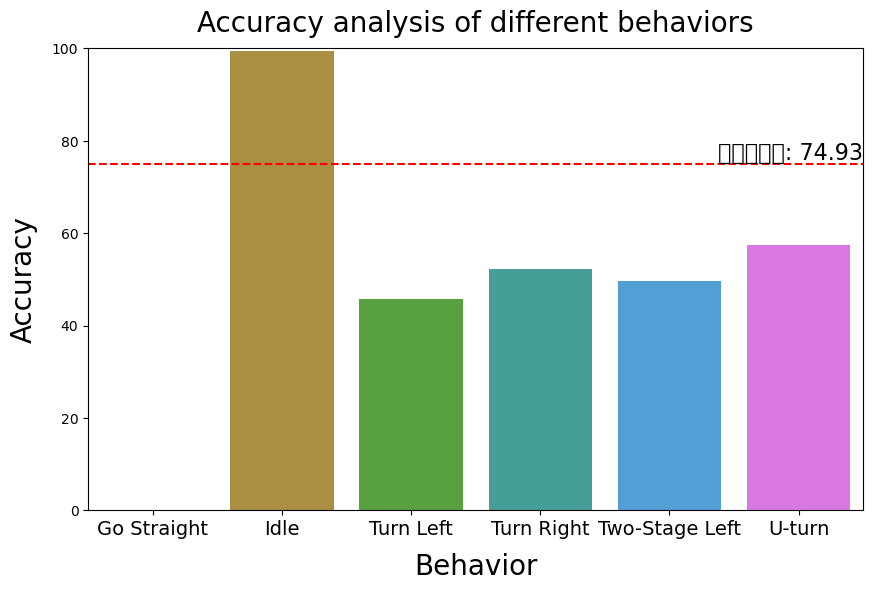

,Action,Predicted: Go Straight,Predicted: Idle,Predicted: Turn Left,Predicted: Turn Right,Predicted: Two-Stage Left,Predicted: U-turn,Accuracy
0,Go Straight,0,20,3,1,0,0,0.000000
1,Idle,0,398,0,0,2,0,99.500000
2,Turn Left,8,0,22,7,11,0,45.833333
3,Turn Right,19,0,25,48,0,0,52.173913
4,Two-Stage Left,7,55,4,8,73,0,49.659864
5,U-turn,0,5,0,8,7,27,57.446809


In [4]:
# 處理IMU的RawData，轉成可以使用的.csv檔案
SensorFusion.Axis_Process(f'{imu_file}.txt', f'{imu_file}.csv')

# 處理ECU的RawData，轉成可以使用的.csv檔案
SensorFusion.ECU_Reverse(f'{ecu_file}.txt', f'{ecu_file}.csv')

# 對齊 IMU 與 ECU 成為可以使用的資料集
SensorFusion.Data_Merge(f'{ecu_file}.csv', f'{imu_file}.csv',  f'{name_file}.csv')

#校正歸零角度
df = pd.read_csv(f'{name_file}.csv')
SensorFusion.calibrate_angles(df, f'{name_file}.csv')

#校正歸角速度  (K依每次開始前機車靜置校正不同有所改變)
df = pd.read_csv(f'{name_file}.csv')
SensorFusion.calibrate_imu(df, k, f'{name_file}.csv')


# 正規化
df = pd.read_csv(f'{name_file}.csv')

feature = ['Atmospheric Pressure', 'Inclination Switch',
       'Fault Code Count', 'Ignition Coil Current Diagnosis',
       'Fault Light Mileage', 'Engine Operating Time',
       'Ignition Advance Angle', 'Idling Correction Ignition Angle',
       'Fuel Injection Prohibition Mode', 'Injection Mode',
       'Bypass Delay Correction', 'ABV Opening', 'ABV Idling Correction',
       'ABV Learning Value', 'Lambda Setting', 'Air-Fuel Ratio Rich',
       'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
       'Intake Manifold Pressure', 'Intake Manifold Front Pressure',
       'MFF_AD_ADD_MMV_REL', 'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV',
       'MFF_AD_FAC_MMV', 'Fuel Injection Quantity', 'MFF_WUP_COR',
       'Ignition Mode', 'Engine RPM', 'Engine RPM Limit', 'Idling Target RPM',
       'Fuel Injection Start Angle', 'Fuel Pump State', 'Engine State',
       'Engine Temperature', 'Water Temperature PWM',
       'Ignition Magnetization Time', 'Fuel Injection Time',
       'Closed Loop Fuel Correction', 'Intake Temperature',
       'Combustion Chamber Intake Temperature', 'TPS Opening',
       'TPS Idling Learning Value', 'Battery Voltage', 'O2 Voltage',
       'Vehicle Speed', 'TPS Voltage', 'Seat Switch State', 
       'X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']


SensorFusion.normalize_data(df, feature, method="minmax", save_path=f'{name_file}.csv')

# 卡爾曼濾波器(https://pypi.org/project/filterpy/)
df = pd.read_csv(f'{name_file}.csv')
SensorFusion.apply_kalman_filter(df, feature,  q_noise=0.0001, r_noise=0.001, save_path=f'{name_file}.csv')

df = pd.read_csv(f'{name_file}.csv')

feature = ['Z-axis Angular Velocity', 'Z-axis Angle', 'Y-axis Acceleration', 'Z-axis Acceleration',
           'X-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Angle']
    
AutoTag.cluster_data(df, feature, method="kmeans", n_clusters=11, model_path=f'{name_file}.pkl', save_path=f'{name_file}.csv')


df = pd.read_csv(f'{name_file}.csv')
df = df[::5]
df.to_csv(f'{name_file}.csv')


df = pd.read_csv(f'{name_file}.csv')
label = pd.read_csv(f'{label_file}.csv')
df['Action'] = label['Action']


# 這裡是直接取前60%當作訓練集後40%為測試集 (所以我的直線準確度是0因為我後半段沒什麼直線XD")
DrivePSTs.train_vomm(df[:int(len(df)*0.6)], 30, 11, False)
Test_Data = DrivePSTs.test_vomm(df[int(len(df)*0.6):], 6, False)


Test_Data = Test_Data.dropna()

print(DrivePSTs.compute_accuracy(Test_Data, 6, None))
DrivePSTs.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Predict'], True)